# Import Libraries

In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing Data

In [593]:
with open('new_eda_data.pkl', 'rb') as file:
    df = pickle.load(file)

In [594]:
# select columns for modelling
df_tags = df[['tags', 'target']].copy()

In [595]:
df_tags.reset_index(drop=True, inplace=True)

In [596]:
df_tags

,tags,target
0,[],1
1,[],0
2,[],1
3,[],0
4,[],0
...,...,...
8499,"[Data Analyst, How to become a data analyst, D...",1
8500,"[Data Analyst, How to become a Data Analyst, B...",1
8501,"[Data Analyst Salary, Data analyst with no exp...",1
8502,"[Working at a big company, Big company data an...",1


# Tags Column Mapping

In [597]:
# store unique tag count across df
unique_tag_count = {}

# iterate through unique tags and map their count
for tag_list in df_tags['tags']:

    for tag in tag_list:
        if tag.lower() in unique_tag_count:
            unique_tag_count[tag.lower()] += 1
        else:
            unique_tag_count[tag.lower()] = 1

# sort unique tag count alphabetically
unique_tag_count = dict(sorted(unique_tag_count.items()))

# find out how many unique tags we have
print(len(unique_tag_count))

31997


In [598]:
# create a dictionary of tags with a count of 100 or greater
top_unique_tag_count = {tag: unique_tag_count[tag] for tag in unique_tag_count if unique_tag_count[tag] >= 100}

In [599]:
len(top_unique_tag_count)

103

In [600]:
# pd.options.mode.chained_assignment = 'None'  # default='warn'

In [601]:
# create empty columns of all unique tags
for tag in top_unique_tag_count:
    df_tags[tag] = df_tags['tags'].apply(lambda x: 1 if tag in [i.lower() for i in x] else 0)

C:\Users\mms\AppData\Local\Temp\ipykernel_12084\2582350675.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tags[tag] = df_tags['tags'].apply(lambda x: 1 if tag in [i.lower() for i in x] else 0)
C:\Users\mms\AppData\Local\Temp\ipykernel_12084\2582350675.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tags[tag] = df_tags['tags'].apply(lambda x: 1 if tag in [i.lower() for i in x] else 0)
C:\Users\mms\AppData\Local\Temp\ipykernel_12084\2582350675.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

In [602]:
# adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [603]:
df_tags.shape

(8504, 105)

In [604]:
df_tags.head()

,tags,target,365 data science,365 datascience,365datascience,ai,alex the analyst,analytics,appliedaicourse,artificial intelligence,best data science course,big data,business analyst,business analytics,business intelligence,cloud computing,coding,colab,coursera,data,data analysis,data analysis tutorial,data analyst,data analyst career,data analyst job,data analytics,data engineer,data mining,data science,data science bootcamp,data science course,data science course for beginners,data science dojo,data science for beginners,data science jobs,data science journey,data science project,data science projects,data science python,data science training,data science tutorial,data science tutorial for beginners,data science tutorial online free,data science tutorial python,data science tutorial tutorials point,data science tutorials,data scientist,data visualization,datacamp,deep learning,dl,great lakes,great learning,great learning academy,how to become a data analyst,how to learn data science,josh starmer,jupyter,ken jee,keras,krish naik deep learning,krish naik machine learning,learn data science,learn python,learn r,machine learning,machine learning tutorial,ml,neural networks,numpy,pandas,power bi,programming,py,pyspark,python,python data science tutorial pdf,python data science tutorial point pdf,python for beginners,python for data science,python programming,python tutorial,python tutorial for beginners,pythontutorial,r for data analysis,r for data science,r programming,r tutorial,rtutorial,scikit-learn,sklearn,spark,sql,sql tutorial,statistics,statquest,step by step,tableau,tensorflow,tutorial,upgrad,want to learn python,want to learn r,what is data science,yt:cc=on
0,[],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,[],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [605]:
# how many empty tags lists in tags column?
df_tags['tags'].apply(lambda x: len(x) == 0).sum()

1065

In [606]:
# drop empty tag lists
df_tags = df_tags[df_tags['tags'].apply(lambda x: len(x) > 0)]
df_tags.reset_index(drop=True, inplace=True)

In [607]:
df_tags

,tags,target,365 data science,365 datascience,365datascience,ai,alex the analyst,analytics,appliedaicourse,artificial intelligence,best data science course,big data,business analyst,business analytics,business intelligence,cloud computing,coding,colab,coursera,data,data analysis,data analysis tutorial,data analyst,data analyst career,data analyst job,data analytics,data engineer,data mining,data science,data science bootcamp,data science course,data science course for beginners,data science dojo,data science for beginners,data science jobs,data science journey,data science project,data science projects,data science python,data science training,data science tutorial,data science tutorial for beginners,data science tutorial online free,data science tutorial python,data science tutorial tutorials point,data science tutorials,data scientist,data visualization,datacamp,deep learning,dl,great lakes,great learning,great learning academy,how to become a data analyst,how to learn data science,josh starmer,jupyter,ken jee,keras,krish naik deep learning,krish naik machine learning,learn data science,learn python,learn r,machine learning,machine learning tutorial,ml,neural networks,numpy,pandas,power bi,programming,py,pyspark,python,python data science tutorial pdf,python data science tutorial point pdf,python for beginners,python for data science,python programming,python tutorial,python tutorial for beginners,pythontutorial,r for data analysis,r for data science,r programming,r tutorial,rtutorial,scikit-learn,sklearn,spark,sql,sql tutorial,statistics,statquest,step by step,tableau,tensorflow,tutorial,upgrad,want to learn python,want to learn r,what is data science,yt:cc=on
0,[Power BI],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"[data science, data scientist, self-taugh data...",0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"[data science, data scientist, self-taugh data...",1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"[data science, data scientist, self-taugh data...",0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"[data science, data scientist, self-taugh data...",1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,"[Data Analyst, How to become a data analyst, D...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7435,"[Data Analyst, How to become a Data Analyst, B...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7436,"[Data Analyst Salary, Data analyst with no exp...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,

# Train, Test, Split

In [608]:
# features
X = df_tags.drop(columns=['tags', 'target'])
# target
y = df_tags['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [609]:
X_train.shape

(5951, 103)

In [610]:
(X_train.index == y_train.index).sum()

5951

# Modelling

In [611]:
# create logistic regression object and fit it with training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [612]:
# function to calculate the accuracy, precision and recall
def apr(y_pred, y_real):       
    
    """ Calculates accuracy, precision, recall
        Requires predicted value first, and then the real value
    """
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)

    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")

In [613]:
# predict on train data
y_train_pred = logreg.predict(X_train)

# check train data metric scores
apr(y_train_pred, y_train)

Accuracy:0.7126533355738531
Precision:0.6916087653661144
Recall:0.8231552162849872
F1:0.7516700551844321


In [614]:
# predict on test data
y_test_pred = logreg.predict(X_test)

# check test data metric scores
apr(y_test_pred, y_test)

Accuracy:0.7163978494623656
Precision:0.7011995637949836
Recall:0.8128950695322377
F1:0.752927400468384


# Threshold Tuning

In [615]:
# create a df with the test data, probabilities, and predictions based on the threshold
df_test = X_test.copy()
df_test[['prob_0', 'prob_1']] = logreg.predict_proba(X_test)
df_test['y_pred'] = np.where(df_test['prob_1']>.3, 1, 0)
df_test['y_actual'] = y_test.copy()

In [616]:
df_test

,365 data science,365 datascience,365datascience,ai,alex the analyst,analytics,appliedaicourse,artificial intelligence,best data science course,big data,business analyst,business analytics,business intelligence,cloud computing,coding,colab,coursera,data,data analysis,data analysis tutorial,data analyst,data analyst career,data analyst job,data analytics,data engineer,data mining,data science,data science bootcamp,data science course,data science course for beginners,data science dojo,data science for beginners,data science jobs,data science journey,data science project,data science projects,data science python,data science training,data science tutorial,data science tutorial for beginners,data science tutorial online free,data science tutorial python,data science tutorial tutorials point,data science tutorials,data scientist,data visualization,datacamp,deep learning,dl,great lakes,great learning,great learning academy,how to become a data analyst,how to learn data science,josh starmer,jupyter,ken jee,keras,krish naik deep learning,krish naik machine learning,learn data science,learn python,learn r,machine learning,machine learning tutorial,ml,neural networks,numpy,pandas,power bi,programming,py,pyspark,python,python data science tutorial pdf,python data science tutorial point pdf,python for beginners,python for data science,python programming,python tutorial,python tutorial for beginners,pythontutorial,r for data analysis,r for data science,r programming,r tutorial,rtutorial,scikit-learn,sklearn,spark,sql,sql tutorial,statistics,statquest,step by step,tableau,tensorflow,tutorial,upgrad,want to learn python,want to learn r,what is data science,yt:cc=on,prob_0,prob_1,y_pred,y_actual
5521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.431506,0.568494,1,0
4667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.672162,0.327838,1,0
3053,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.276442,0.723558,1,0
5751,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.555521,0.444479,1,1
6920,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.663947,0.336053,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.431506,0.568494,1,1
3498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.120693,0.879307,1,1
3803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.569223,0.43077

In [617]:
# function to get metrics and confusion matrix
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [618]:
get_results(y_test, df_test['y_pred'])

The confusion matrix for your predictions is:
[[254 443]
 [ 49 742]] 

The accuracy of your model is: 0.6693548387096774
The recall of your model is: 0.9380530973451328
The precision of your model is: 0.6261603375527426
The F1-score of your model is: 0.7510121457489879


In [619]:
# view class metrics report
print(metrics.classification_report(y_test, df_test['y_pred']))

              precision    recall  f1-score   support

           0       0.84      0.36      0.51       697
           1       0.63      0.94      0.75       791

    accuracy                           0.67      1488
   macro avg       0.73      0.65      0.63      1488
weighted avg       0.73      0.67      0.64      1488



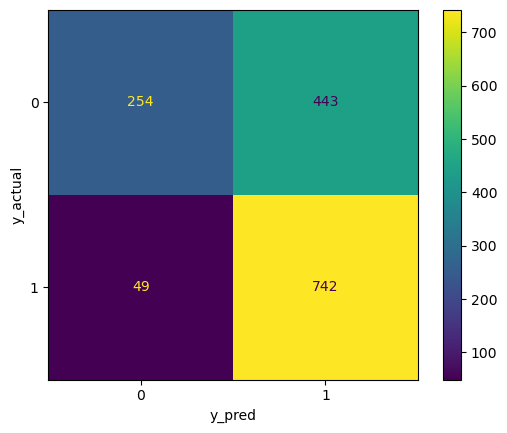

In [620]:
# visualize the confusion matrix
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, df_test['y_pred'])).plot()
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.show()